# Principal Component Analysis
The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors. A best-fitting line is one that minimizes the average squared distance between the points and the line in this case. These directions form an orthonormal basis, in which the data's component dimensions are uncorrelated linearly. Main component analysis (PCA) is the process of computing the principal components and utilizing them to modify the foundation of the data, often simply using the first few and disregarding the rest.
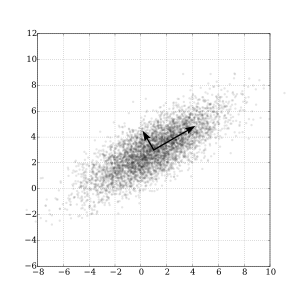
PCA is utilized in exploratory data analysis and predictive model development. It's often used for dimensionality reduction, where each data point is projected onto only the first few principal components to produce lower-dimensional data while keeping as much variance as feasible. The first principle component can be defined as a path that maximizes the anticipated data's variance. The i-th principal component can be taken as a direction orthogonal to the first i-1 principal components that maximizes the variance of the projected data.The starting point of PCA is the matrix of correlation coefficients derived from the original data set. Strictly speaking, the rationale behind the method requires that the correlations be obtained from variables measured on some continuous scale. 

In practice, these variables may be precisely continuous, as with something like length or weight, or they may be discrete as when the variable is something we have counted. It is convenient to treat the two in the same way and we may conveniently refer to them collectively, as being metrical (i.e., measured). The method is sometimes used when the correlation coefficients have not been calculated from metrical variables. 

#### First component
In order to maximize variance, the first weight vector w(1) thus has to satisfy

$ \mathbf {w} _{(1)}=\arg \max _{\Vert \mathbf {w} \Vert =1}\,\left\{\sum _{i}(t_{1})_{(i)}^{2}\right\}=\arg \max _{\Vert \mathbf {w} \Vert =1}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}$

#### Further components
The k-th component can be found by subtracting the first k − 1 principal components from X:

$ \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\mathsf {T}}$

#### Covariances
The sample covariance Q between two of the different principal components over the dataset is given by:
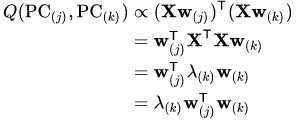

### Singular value decomposition
The principal components transformation can also be associated with another matrix factorization, the singular value decomposition (SVD) of X:

$\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{W}^T$
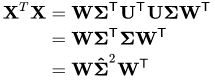

**The goal** of PCA is to reduce the dimensionality of the feature vectors used in training machine learning algorithms. 

The steps in PCA are:

**1. Stadardize (center and scale) the data.**

$z={x-{\bar {x}} \over S}$

**2. Compute the covariance or correlation matrix**
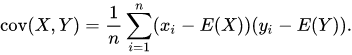

$\rho _{XY}=\sigma _{XY}/(\sigma _{X}\sigma _{Y})$

**3. Find the eigenvalues and the orthonormal eigenvectors of S**


**4. Find the principal components**
We arrange the eigenvalues found in the previous step in the decreasing order. The first principal component is in the direction of the 1st eigenvector. The entries of each are called loading scores 

**5. Reduce the dimension of the data**
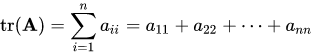

## Data set
### penguins
To illustrate this point, let us import the following packages, load the penguins dataset, and show data related with the bill_length versus bill_depth.

**Bill dimensions**
The culmen is the upper ridge of a bird’s bill. In the simplified penguins data, culmen length and depth are renamed as variables bill_length_mm and bill_depth_mm to be more intuitive.

**flipper_length_mm**: flipper length (mm)

**body_mass_g**: body mass (g)

**island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

**sex**: penguin sex

### load_breast_cancer
Features
This is a binary classification dataset.

It has no Missing attribute or Null values.

The class distribution is as follows.

212: malignant
357: benign
This is a commonly used dataset. Machine learning papers have also used this dataset to address regression problems.

All the data types are numerical.

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme()

df = sns.load_dataset("penguins")
df.dropna(inplace=True)
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
y = df.species.to_numpy()

In [17]:
A = X - X.mean(axis = 0)

U, sigma, Vt = np.linalg.svd(A, full_matrices=False)

print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

np.shape(U) = (333, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 



In [18]:
sigma_mat = np.diag(sigma)
print(f"A == U * sigma_mat * Vt: {np.allclose(A, np.dot(U, np.dot(sigma_mat, Vt)))} \n")

A == U * sigma_mat * Vt: True 



In [19]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A.dot(W2)

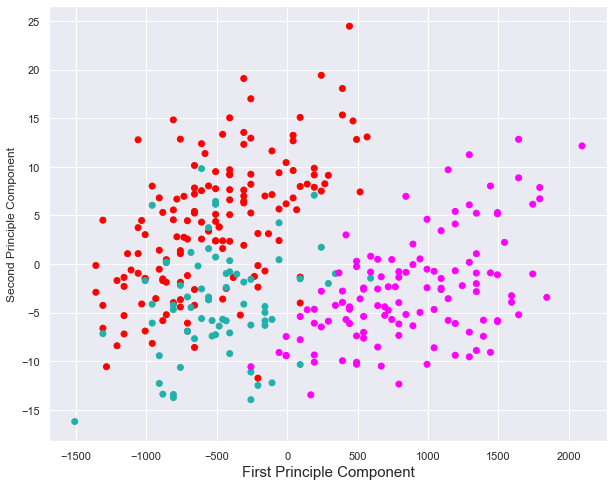

In [20]:
def colors(y):
    if y == "Adelie":
        return "red"
    elif y == "Gentoo":
        return "magenta"
    else:
        return "lightseagreen"

c = [colors(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

**From the above graph, you can observe that the 3 classes Chinstrap, Adelie and Gentoo, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the Gentoo class is spread out as compared to another classes.**

In [24]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



**The fit learns some quantities from the data, most importantly the "explained variance"**

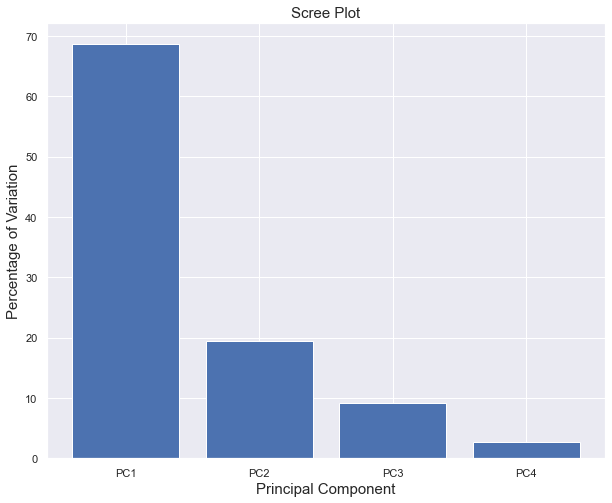

In [22]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 15)
plt.show()

**Create a bar chart for principal components**

**use pca.transform to see how our data looks like in the new coordinate system**

In [25]:
# we use pca.transform to see how our data looks like in the new coordinate system

# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4
0,-1.853593,0.032069,-0.234902,0.528397
1,-1.316254,-0.443527,-0.027470,0.401727
2,-1.376605,-0.161230,0.189689,-0.528662
3,-1.885288,-0.012351,-0.628873,-0.472893
4,-1.919981,0.817598,-0.701051,-0.196416
...,...,...,...,...
328,1.997716,-0.976771,0.379425,0.160892
329,1.832651,-0.784510,0.240758,-0.008955
330,2.751505,0.266556,-0.419306,0.236256
331,1.713854,-0.725875,-0.262764,0.330004


In [26]:
# we add to the previous table the labels for each flower

projected_df = pd.concat([pca_df, df.species], axis = 1)
projected_df

,PC1,PC2,PC3,PC4,species
0,-1.853593,0.032069,-0.234902,0.528397,Adelie
1,-1.316254,-0.443527,-0.027470,0.401727,Adelie
2,-1.376605,-0.161230,0.189689,-0.528662,Adelie
3,-1.885288,-0.012351,-0.628873,-0.472893,NaN
4,-1.919981,0.817598,-0.701051,-0.196416,Adelie
...,...,...,...,...,...
338,NaN,NaN,NaN,NaN,Gentoo
340,NaN,NaN,NaN,NaN,Gentoo
341,NaN,NaN,NaN,NaN,Gentoo
342,NaN,NaN,NaN,NaN,Gentoo


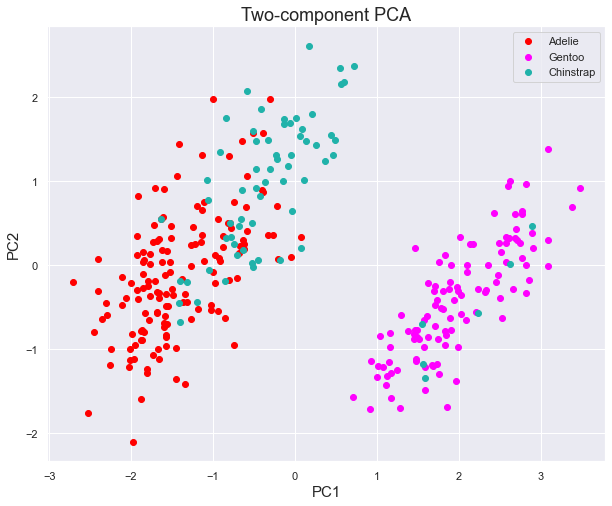

In [31]:
targets = ["Adelie", "Gentoo", "Chinstrap"]
colors = ["red", "magenta", "lightseagreen"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df = projected_df[projected_df['species'] == target]
    plt.scatter(temp_df["PC1"],
                temp_df["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA', fontsize = 18)
plt.legend(targets)
plt.show()

**From the above graph, the Gentoo class is spread out as compared to another classes.**

### load_breast_cancer

In [32]:
    from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame = True)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [33]:
features = cancer["feature_names"]
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [34]:
targets = cancer["target_names"]
targets

array(['malignant', 'benign'], dtype='<U9')

In [35]:
cancer_df = cancer["frame"]
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [36]:
X = cancer_df[features].to_numpy()
scaled_X = preprocessing.scale(X)
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [37]:
pca = PCA()   # perform PCA and get 30 new coordinates that we call principal components (PCs)
pca.fit(scaled_X)


print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
per_var = [4.427e+01 1.897e+01 9.390e+00 6.600e+00 5.500e+00 4.020e+00 2.250e+00
 1.590e+00 1.390e+00 1.170e+00 9.800e-01 8.700e-01 8.000e-01 5.200e-01
 3.100e-01 2.700e-01 2.000e-01 1.800e-01 1.600e-01 1.000e-01 1.000e-01
 9.000e-02 8.000e-02 6.000e-02 5.000e-02 3.000e-02 2.000e-02 1.000e-02
 0.000e+00 0.000e+00] 



**Here we got the list of explained_variance**

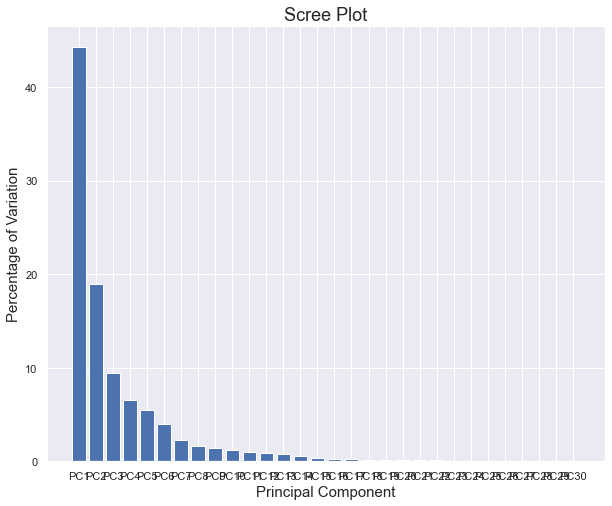

In [38]:
labels = [f"PC{i}" for i in range(1,31)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 31), height = per_var, tick_label = labels)
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Scree Plot', fontsize = 18)
plt.show()

In [39]:
# this shows how each PC can be obtained using the original coordinates

# PC1 = 0.219 * mean radius - 0.234 * mean texture ......

labels = [f"PC{i}" for i in range(1, 31)]

pd.DataFrame(pca.components_, columns = labels, index = cancer['feature_names'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
mean radius,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
mean texture,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
mean perimeter,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
mean area,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
mean smoothness,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
mean compactness,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,...,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
mean concavity,-0.124088,0.011400,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,...,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
mean concave points,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152322,-0.231531,-0.177121,...,0.042619,0.036252,0.030559,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048361
mean symmetry,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,...,-0.112141,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060488,0.064638,-0.134174
mean fractal dimension,0.095486,0.240934,0.086386,0.074956,-0.069293,0.012936,-0.135602,0.008055,0.572069,0.081103,...,0.077362,0.029551,0.050508,0.069921,-0.128305,-0.172134,-0.311639,-0.076648,-0.029563,0.012610


In [40]:
pca_data = pca.transform(scaled_X)

pca_df = pd.DataFrame(pca_data, columns = labels)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


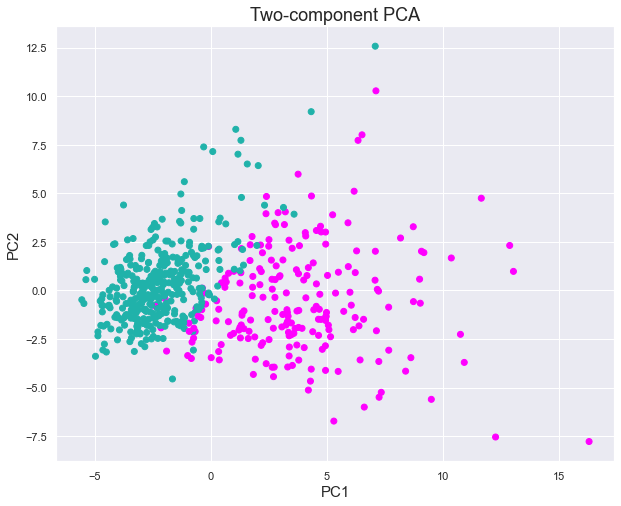

In [41]:
def color(label):
    if label == 0:
        return "magenta"
    else:
        return "lightseagreen"

colors = [color(label) for label in cancer_df["target"]]

plt.figure(figsize = (10, 8))
plt.scatter(pca_df.PC1, pca_df.PC2, c = colors)
plt.xlabel("PC1", fontsize = 15)
plt.ylabel("PC2", fontsize = 15)
plt.title("Two-component PCA", fontsize = 18)
plt.show()

**From the above graph, you can observe that the 2 classes malignant and benign, when projected to a two-dimensional space, can be linearly separable up to some extent. Other observations can be that the one class is spread out as compared to another classes.**

In [42]:
color(1)

'lightseagreen'

# Reference
Principal component analysis,https://en.wikipedia.org/wiki/Principal_component_analysis

Covariance and correlation,https://en.wikipedia.org/wiki/Covariance_and_correlation

In Depth: Principal Component Analysis,https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

 \International Encyclopedia of Education (Third Edition), 2010, Principal Component Analysis,https://www.sciencedirect.com/topics/medicine-and-dentistry/principal-component-analysis